In [5]:
import numptrain as np
import pandas as pd
import seaborn as sns
import explore as e
import matplotlib.pyplot as plt
from importlib import reload
import warnings
from sklearn.model_selection import TimeSeriesSplit
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('dark_background')

In [6]:
store_data = pd.read_csv('data/tsa_store_data.csv').sort_values(by='sale_date')
store_data.sale_date = pd.to_datetime(store_data.sale_date)
store_data.index = store_data.sale_date
store_data.sort_index()
store_data.dtypes
store_data['sale_total'] = store_data.sale_amount * store_data.item_price
store_data = store_data.resample('D').sum()

Split data

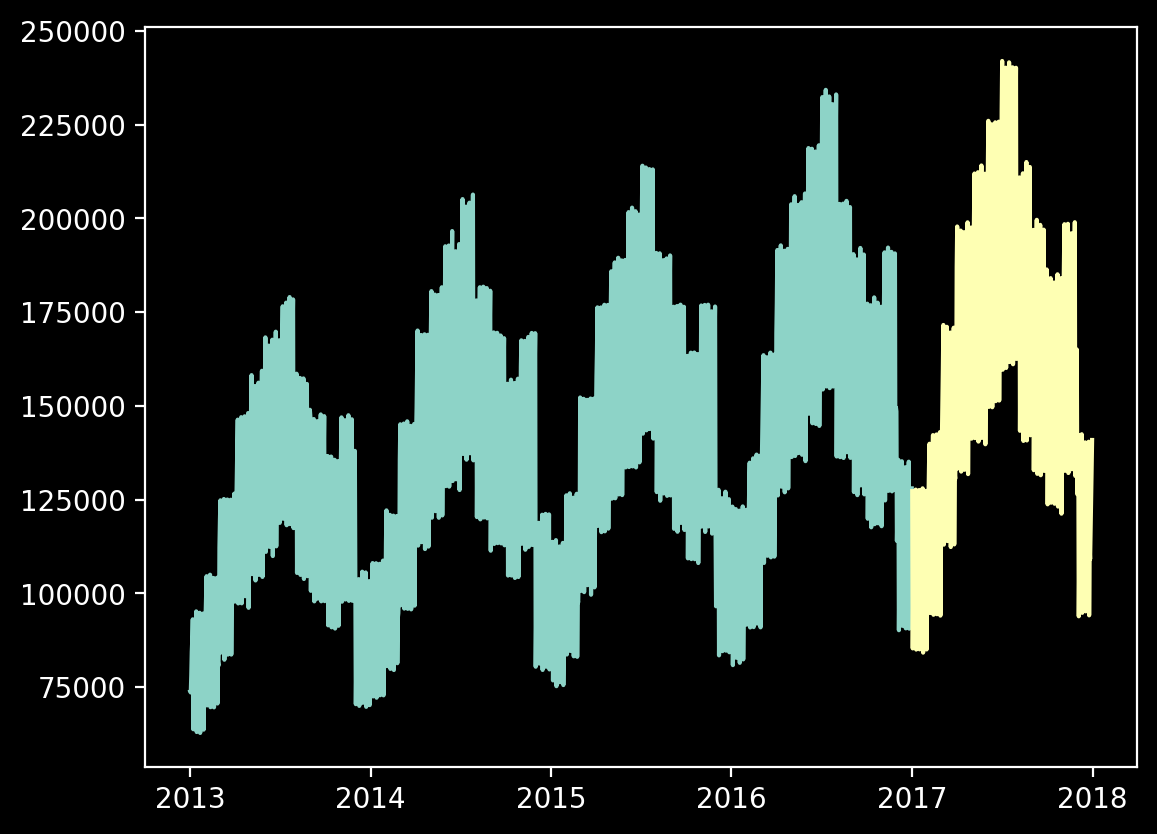

In [7]:

train,test = e.split_data(store_data,.8)
plt.plot(train.index,train.sale_total)
plt.plot(test.index,test.sale_total)

<AxesSubplot: xlabel='sale_date', ylabel='sale_total'>

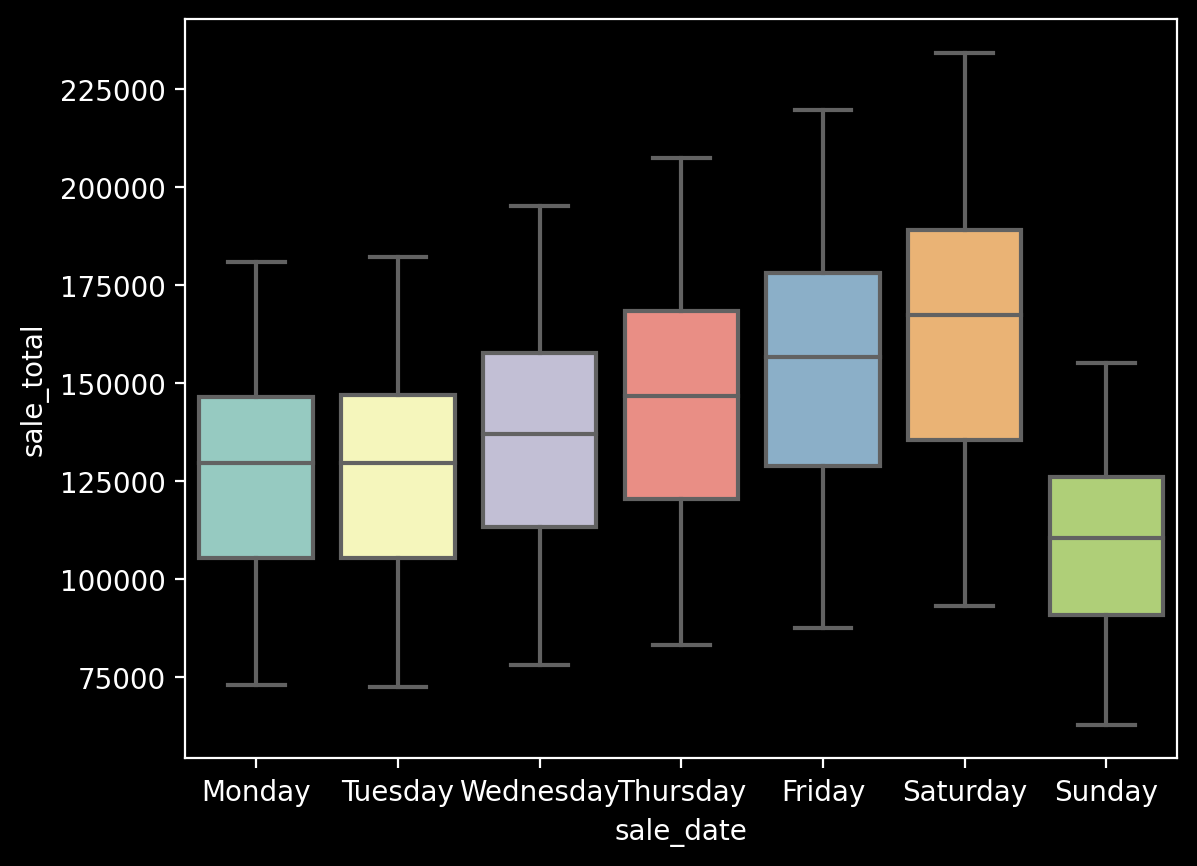

In [4]:
plt.style.use('dark_background')
sns.boxplot(data=train,x=train.index.shift(-1).day_name(),y='sale_total')

<AxesSubplot: title={'center': 'Seasonal Plot'}, xlabel='sale_date'>

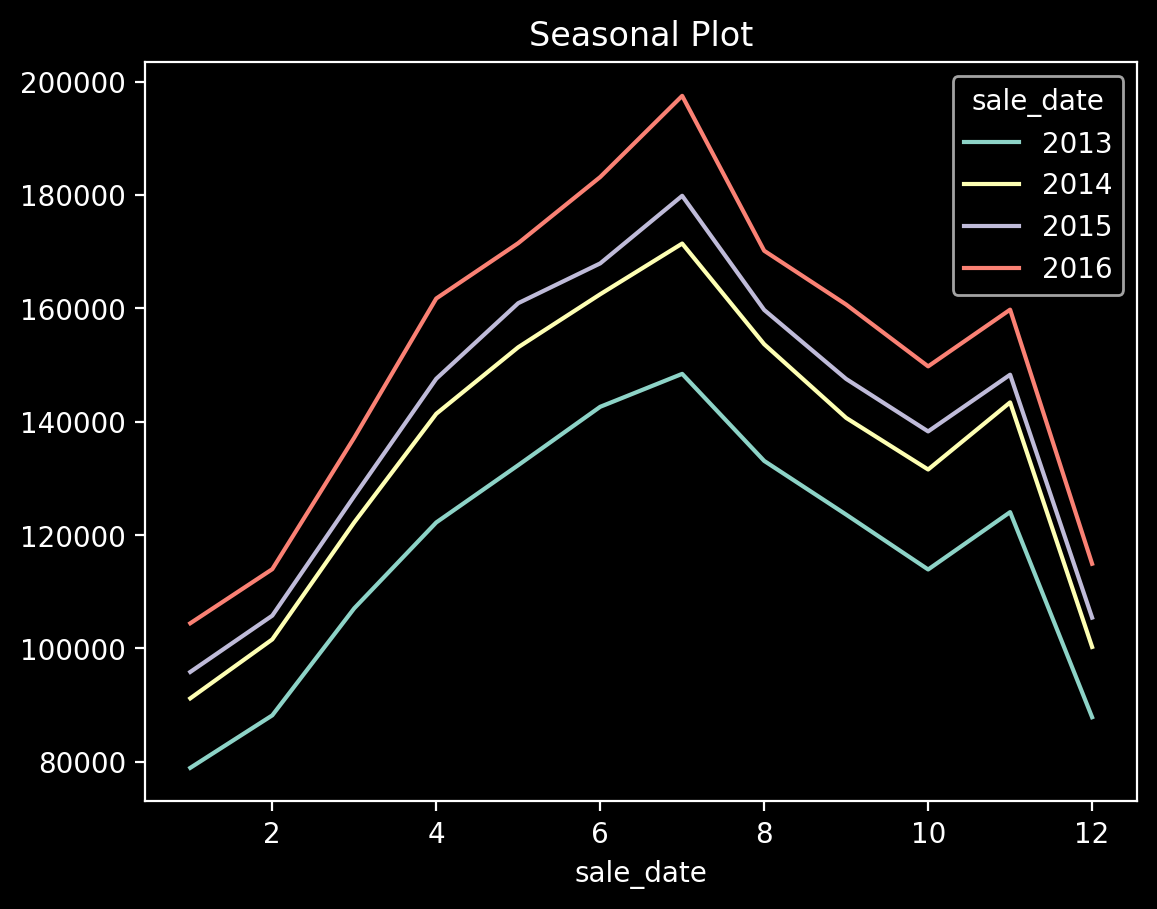

In [9]:
train.groupby([train.index.year, train.index.month]).sale_total.mean().unstack(0).plot(title='Seasonal Plot')